Model Evaluation - Loss: 0.0701, Accuracy: 1.0000

XOR Gate Predictions with Binary Classification:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Input: [0. 0.], Target: 0, Predicted: 0 (Raw: 0.2422)
Input: [0. 1.], Target: 1, Predicted: 1 (Raw: 0.9989)
Input: [1. 0.], Target: 1, Predicted: 1 (Raw: 0.9987)
Input: [1. 1.], Target: 0, Predicted: 0 (Raw: 0.0009)


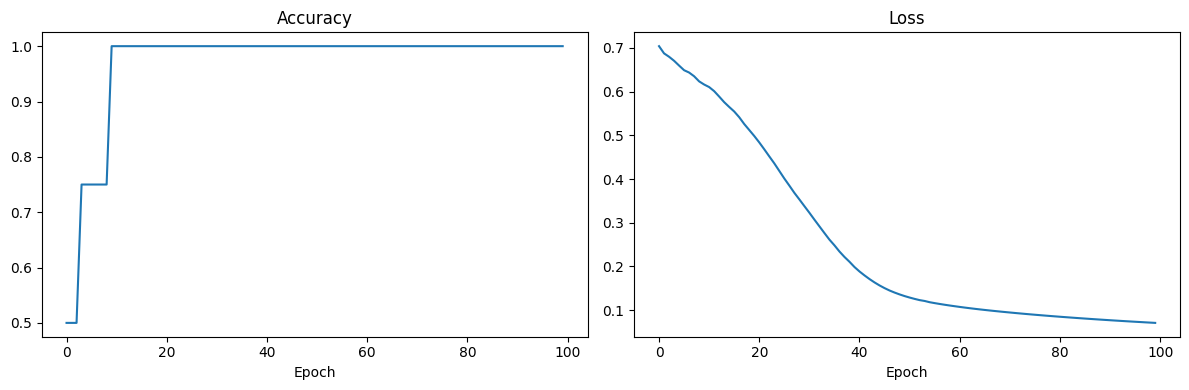

In [12]:
import numpy as np
from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

model = Sequential([
    layers.Dense(8, input_dim=2, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

history = model.fit(X, y, epochs=100, batch_size=4, verbose=0)

loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Evaluation - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}\n")

print("XOR Gate Predictions with Binary Classification:")
predictions = model.predict(X)
for i in range(len(X)):
    binary_pred = 1 if predictions[i][0] > 0.5 else 0
    print(f"Input: {X[i]}, Target: {int(y[i][0])}, Predicted: {binary_pred} (Raw: {predictions[i][0]:.4f})")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(history.history['accuracy']); plt.title('Accuracy'); plt.xlabel('Epoch')
plt.subplot(1,2,2); plt.plot(history.history['loss']); plt.title('Loss'); plt.xlabel('Epoch')
plt.tight_layout(); plt.show()